In [27]:
import os #for file handling
import cv2 #for image processing
import tensorflow as tf #for dl
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for plotting graphs
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

In [28]:
mnist=tf.keras.datasets.mnist #loading the data for (0-9) handwritten digits

In [29]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()

In [30]:
#normalising the data
x_train=tf.keras.utils.normalize(x_train, axis=1) #normalised along individual rows hence axis=1
x_test=tf.keras.utils.normalize(x_test, axis=1)

In [31]:
#creating the model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [32]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [33]:
#fitting the model
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2216 - accuracy: 0.9338
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0895 - accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0583 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0432 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0314 - accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0257 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0205 - accuracy: 0.9933
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0183 - accuracy: 0.9937
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0146 - accuracy: 0.9951
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.012

In [34]:
model.save('numbers.model')

INFO:tensorflow:Assets written to: numbers.model\assets


INFO:tensorflow:Assets written to: numbers.model\assets


In [35]:
#evaluating the model
loss,accuracy=model.evaluate(x_test,y_test)
print(loss*100)
print(accuracy*100)

313/313 [==============================] - 1s 1ms/step - loss: 0.1067 - accuracy: 0.9777
10.66807508468628
97.76999950408936


1/1 [==============================] - 0s 44ms/step
The number is probably a  {9}


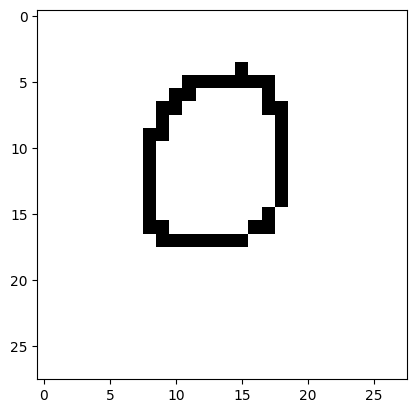

1/1 [==============================] - 0s 23ms/step
The number is probably a  {1}


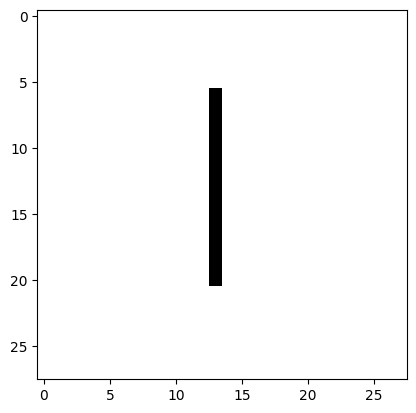

1/1 [==============================] - 0s 24ms/step
The number is probably a  {2}


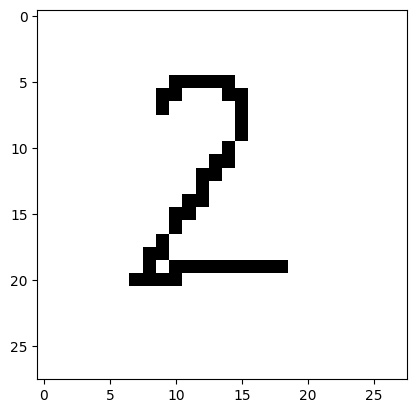

1/1 [==============================] - 0s 18ms/step
The number is probably a  {3}


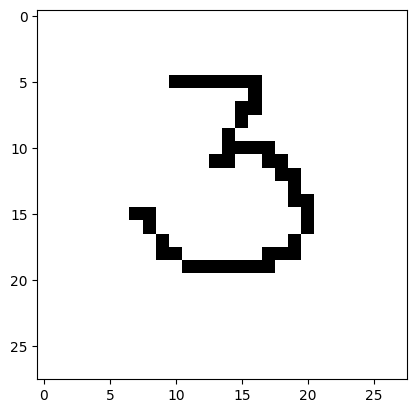

1/1 [==============================] - 0s 24ms/step
The number is probably a  {4}


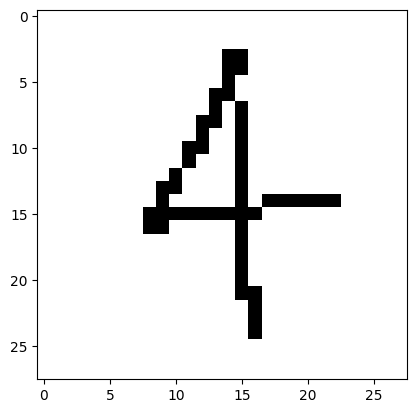

1/1 [==============================] - 0s 28ms/step
The number is probably a  {5}


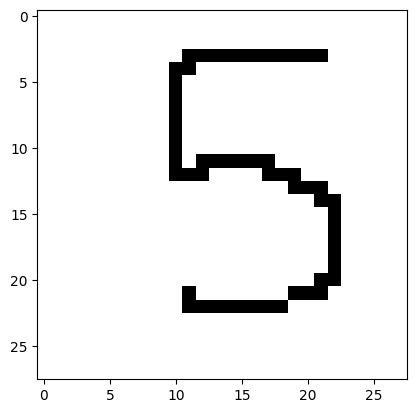

1/1 [==============================] - 0s 23ms/step
The number is probably a  {6}


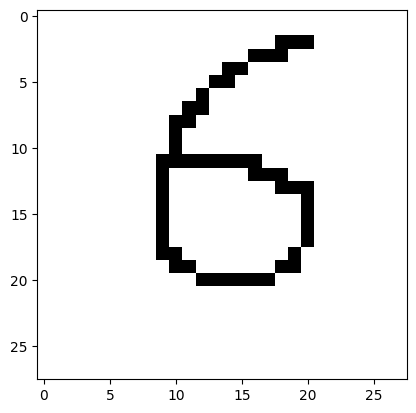

1/1 [==============================] - 0s 19ms/step
The number is probably a  {7}


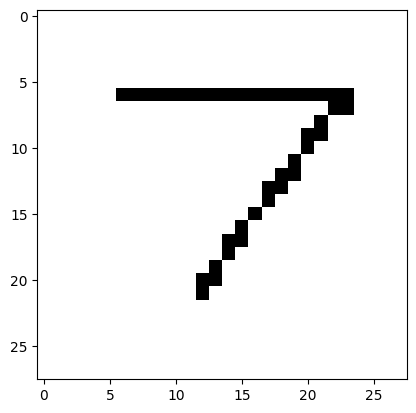

1/1 [==============================] - 0s 20ms/step
The number is probably a  {8}


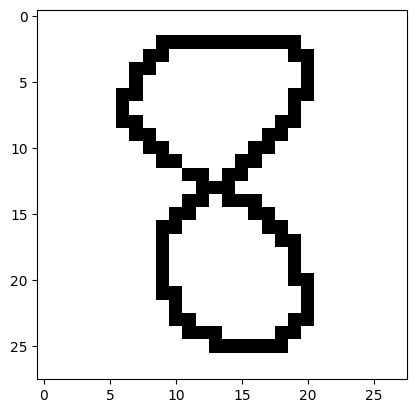

1/1 [==============================] - 0s 27ms/step
The number is probably a  {9}


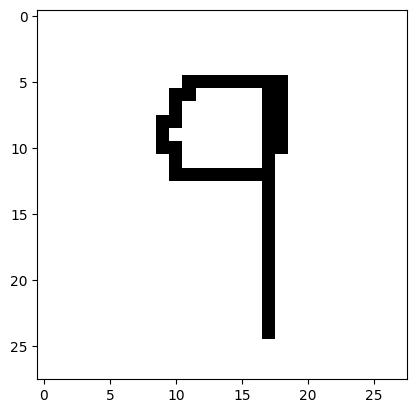

In [36]:
#load and use the model
model=tf.keras.models.load_model('numbers.model')
image_number=0
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img=cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img=np.invert(np.array([img]))
        prediction=model.predict(img)
        print("The number is probably a ",{np.argmax(prediction)})
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number+=1

In [44]:
model = tf.keras.models.load_model('numbers.model')


def predict_digit(image_path):
    try:
        img = cv2.imread(image_path)[:, :, 0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        return np.argmax(prediction)
    except:
        return None


def open_file_dialog():
    file_path = filedialog.askopenfilename(
        filetypes=[("Image files", "*.png *.jpg *.jpeg *.gif *.bmp")])
    if file_path:
        digit = predict_digit(file_path)
        if digit is not None:
            result_label.config(text=f"The number is probably a {digit}")
            img = Image.open(file_path)
            # Increase image size by 2 times
            img = img.resize((img.width * 4, img.height * 4), Image.ANTIALIAS)
            img = ImageTk.PhotoImage(img)
            image_label.config(image=img)
            image_label.image = img
        else:
            result_label.config(text="Error")


# Create the main window
root = tk.Tk()
root.title("Digit Recognition")
root.geometry("400x400")

# Create and configure widgets
open_button = tk.Button(root, text="Open Image", command=open_file_dialog)
result_label = tk.Label(root, text="", font=("Helvetica", 16))
image_label = tk.Label(root)

# Layout widgets
open_button.pack(pady=10)
result_label.pack()
image_label.pack()

root.mainloop()

1/1 [==============================] - 0s 41ms/step


C:\Users\parth\AppData\Local\Temp\ipykernel_5328\3269925751.py:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((img.width * 2, img.height * 2), Image.ANTIALIAS)
